In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

Part 1

In [63]:
##mMaking a dataframe using pandas
df = pd.read_csv("women_in_parliament.csv")
#Checking how the dataframe looks
display(df.head())

,COU,Country,IND,Indicator,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2002,2002,PC,Percentage,0,Units,NaN,NaN,25.3,NaN,NaN
1,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2012,2012,PC,Percentage,0,Units,NaN,NaN,24.7,NaN,NaN
2,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2015,2015,PC,Percentage,0,Units,NaN,NaN,26.7,NaN,NaN
3,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2017,2017,PC,Percentage,0,Units,NaN,NaN,28.7,NaN,NaN
4,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,30.0,NaN,NaN


In [64]:
##Inspecting dataset: i want to remove certain columns
df = df.drop(columns=["COU", "IND", "Indicator", "Year", "Unit Code", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"])

In [65]:
##Checking the current columns in the dataframe
display(df.head())

,Country,YEAR,Unit,Value
0,Australia,2002,Percentage,25.3
1,Australia,2012,Percentage,24.7
2,Australia,2015,Percentage,26.7
3,Australia,2017,Percentage,28.7
4,Australia,2019,Percentage,30.0


Part 2

2.1

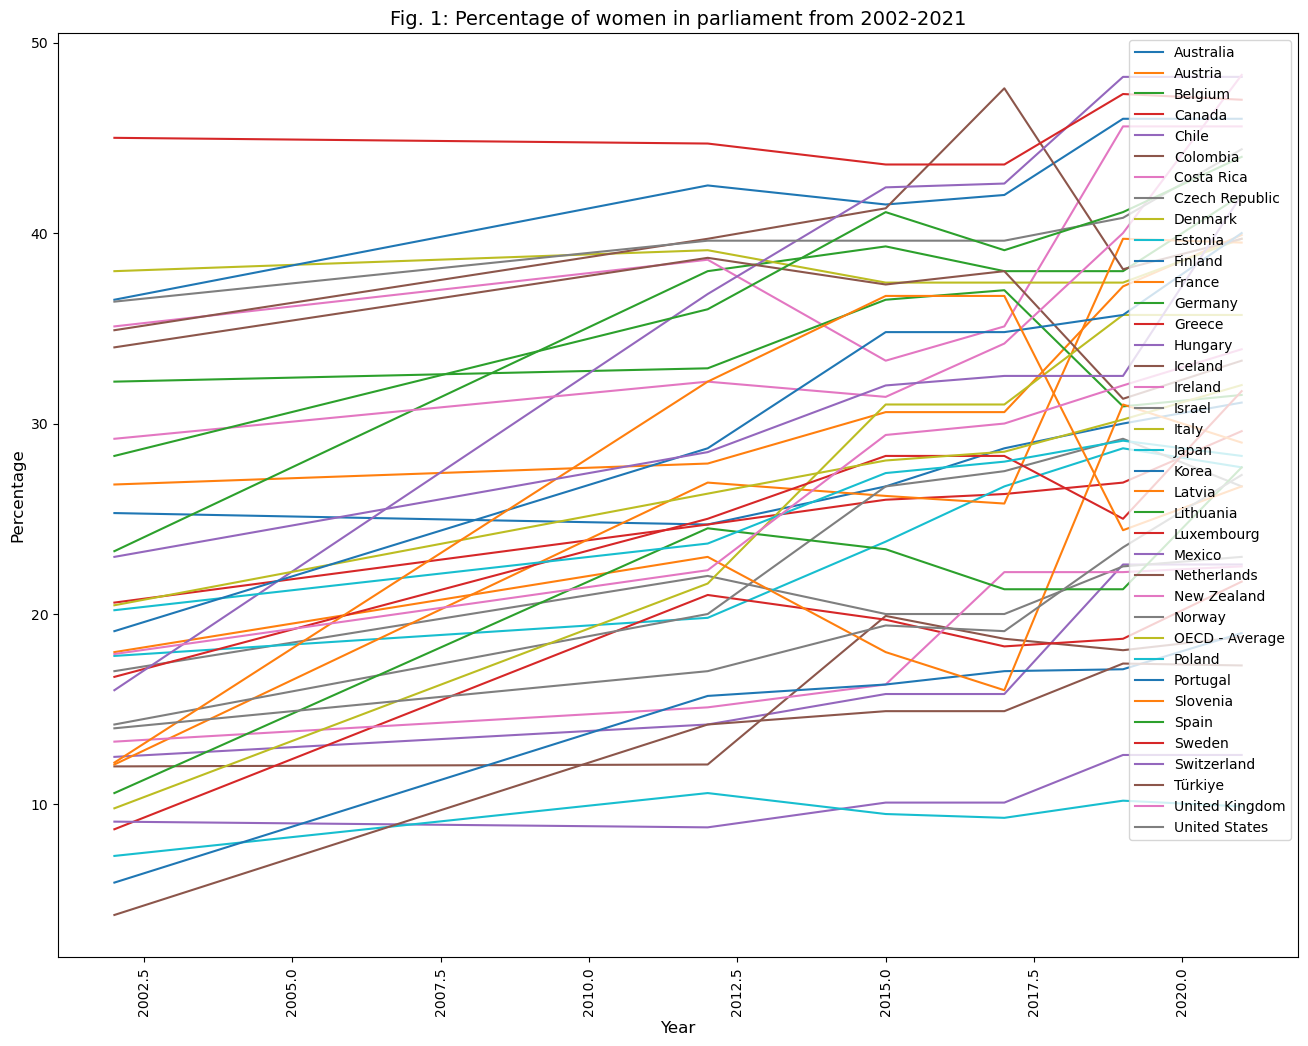

In [66]:
##Figure 1: all countries from the dataset + OECD average
#Grouping by country column
groups = df.groupby("Country")

plt.figure(figsize=(16, 12))

for name, group in groups:
    plt.plot(group["YEAR"], group["Value"], label=name)

#Placing the legend    
plt.legend()
plt.legend(loc="upper right")

#Naming title and axis and rotating the country names
plt.title("Fig. 1: Percentage of women in parliament from 2002-2021", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=90)

##plt.savefig('fig_1.png', dpi=300)
plt.show()

2.2

In [67]:
##OECD average, already a part of the dataset, just need to locate it
row = df.loc[df["Country"] == "OECD - Average"]

print(row)

            Country  YEAR        Unit  Value
210  OECD - Average  2002  Percentage  20.46
211  OECD - Average  2012  Percentage  26.32
212  OECD - Average  2015  Percentage  28.06
213  OECD - Average  2017  Percentage  28.52
214  OECD - Average  2019  Percentage  30.21
215  OECD - Average  2021  Percentage  32.02


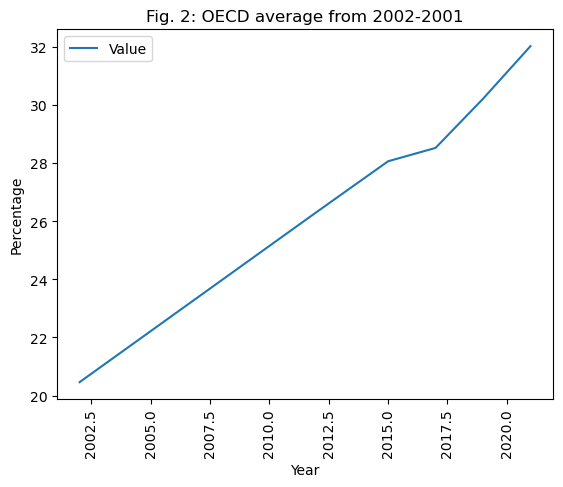

In [68]:
##Figure 2: OECD average from 2002-2021
row = df.loc[df["Country"] == "OECD - Average"]

#Making a new figure with the located OECD average
row.plot(x="YEAR", y="Value", kind="line")

#Assigning names etc.
plt.title("Fig. 2: OECD average from 2002-2001")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xticks(rotation=90)

##plt.savefig('fig_2.png', dpi=300)
plt.show()

2.3

In [69]:
##table 1: Countries with a percentage below the OECD average in 2002
df_below_avg = df.query("YEAR == 2002 and Value < 20.46")

#Printing the countries below average and how many there are
print(df_below_avg)

amount_below_avg = df_below_avg.shape[0]
print(f"Number of countries below the OECD average in 2002: {amount_below_avg}")

            Country  YEAR        Unit  Value
24   Czech Republic  2002  Percentage   17.0
42           France  2002  Percentage   12.1
54           Greece  2002  Percentage    8.7
60          Hungary  2002  Percentage    9.1
72          Ireland  2002  Percentage   13.3
78            Italy  2002  Percentage    9.8
84            Japan  2002  Percentage    7.3
90            Korea  2002  Percentage    5.9
96       Luxembourg  2002  Percentage   16.7
102          Mexico  2002  Percentage   16.0
126          Poland  2002  Percentage   20.2
132        Portugal  2002  Percentage   19.1
156         Türkiye  2002  Percentage    4.2
162  United Kingdom  2002  Percentage   17.9
168   United States  2002  Percentage   14.0
174           Chile  2002  Percentage   12.5
180        Colombia  2002  Percentage   12.0
186         Estonia  2002  Percentage   17.8
192          Israel  2002  Percentage   14.2
198          Latvia  2002  Percentage   18.0
204        Slovenia  2002  Percentage   12.2
222       

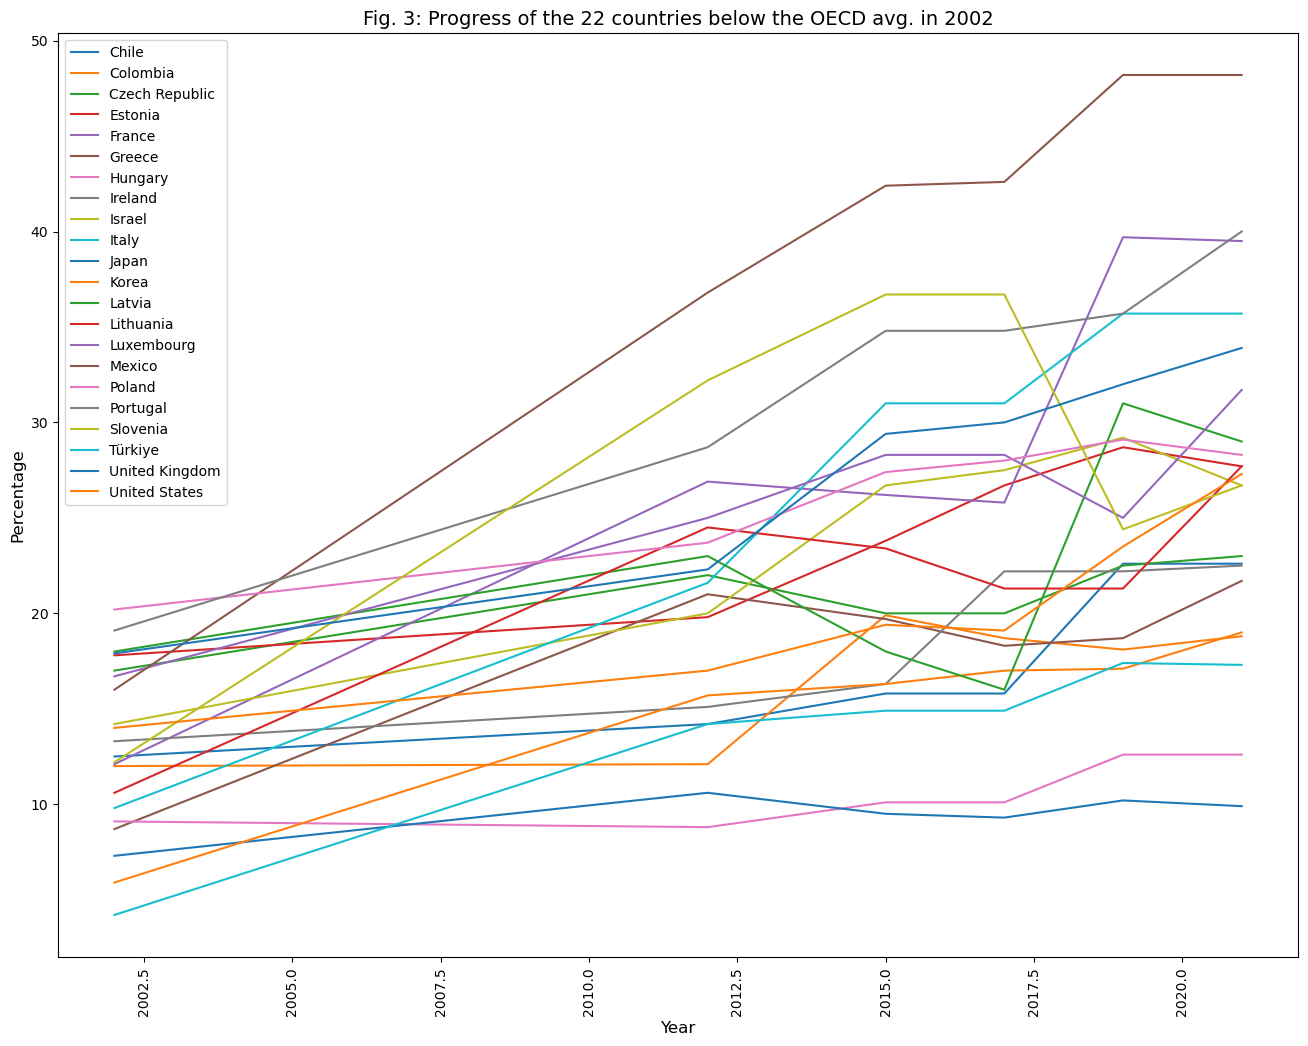

In [70]:
##figure 3: The progress of the 22 countries who started below the OECD average in 2002
#Using previous variables to make a figure to illustrate the 22 countries' growth
country_b_list = df_below_avg['Country'].tolist()
country_b_filtered = df[df['Country'].isin(country_b_list)]

group_b = country_b_filtered.groupby("Country")

plt.figure(figsize=(16, 12))

for name, group in group_b:
    plt.plot(group["YEAR"], group["Value"], label=name)
    
plt.legend()
plt.legend(loc="upper left")

plt.title("Fig. 3: Progress of the 22 countries below the OECD avg. in 2002", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=90)

##plt.savefig('fig_3.png', dpi=300)
plt.show()

In [ ]:
2.4

In [71]:
##table 2: Countries with a percentage above the OECD average in 2002
df_above_avg = df.query("YEAR == 2002 and Value > 20.46")
print(df_above_avg)

amount_above_avg = df_above_avg.shape[0]
print(f"Number of countries above the OECD average in 2002: {amount_above_avg}")

         Country  YEAR        Unit  Value
0      Australia  2002  Percentage   25.3
6        Austria  2002  Percentage   26.8
12       Belgium  2002  Percentage   23.3
18        Canada  2002  Percentage   20.6
30       Denmark  2002  Percentage   38.0
36       Finland  2002  Percentage   36.5
48       Germany  2002  Percentage   32.2
66       Iceland  2002  Percentage   34.9
108  Netherlands  2002  Percentage   34.0
114  New Zealand  2002  Percentage   29.2
120       Norway  2002  Percentage   36.4
138        Spain  2002  Percentage   28.3
144       Sweden  2002  Percentage   45.0
150  Switzerland  2002  Percentage   23.0
216   Costa Rica  2002  Percentage   35.1
Number of countries above the OECD average in 2002: 15


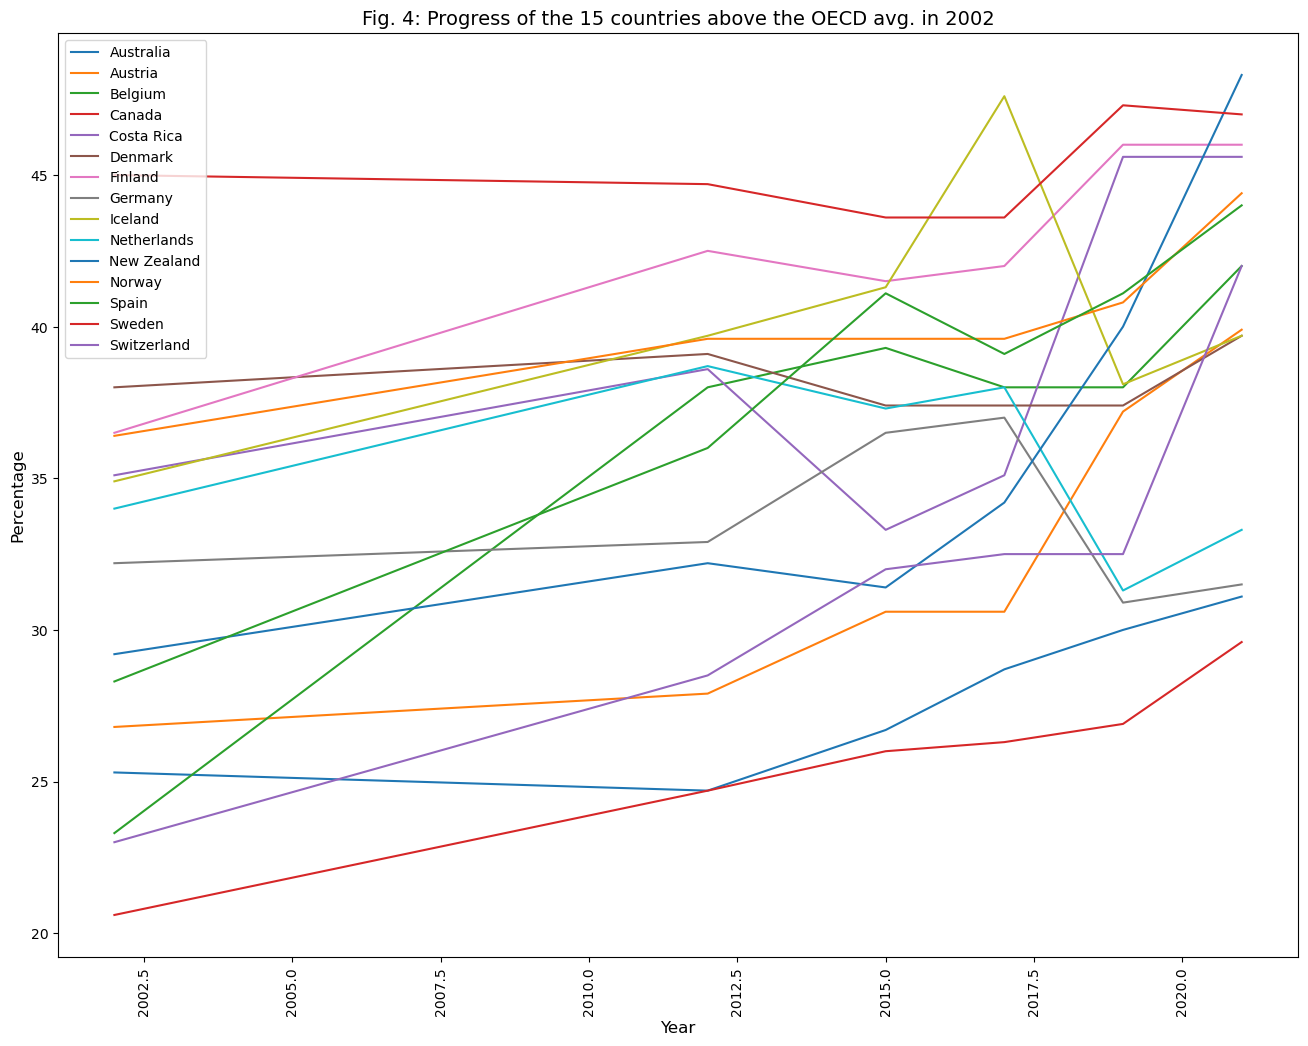

In [72]:
##Figure 4: The progress of the 15 countries who started above the OECD average in 2002
country_a_list = df_above_avg['Country'].tolist()
country_a_filtered = df[df['Country'].isin(country_a_list)]

group_a = country_a_filtered.groupby("Country")

plt.figure(figsize=(16, 12))

for name, group in group_a:
    plt.plot(group["YEAR"], group["Value"], label=name)
    
plt.legend()
plt.legend(loc="upper left")

plt.title("Fig. 4: Progress of the 15 countries above the OECD avg. in 2002", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=90)

##plt.savefig('fig_4.png', dpi=300)
plt.show()

2.5

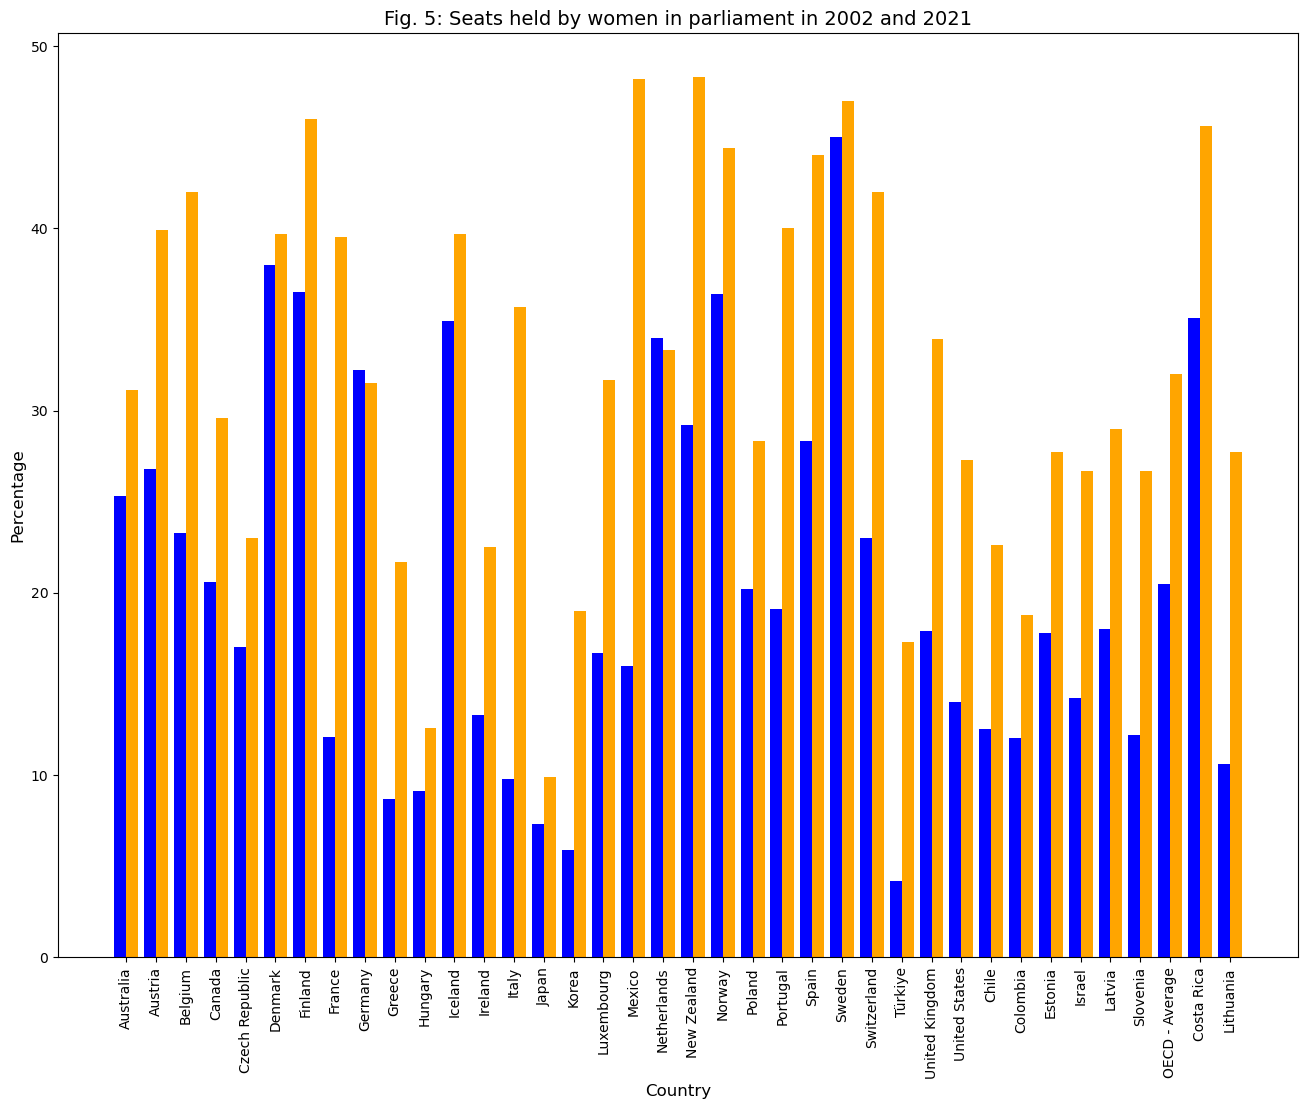

In [73]:
##Figure 5: showing only the percentages from 2002 and 2021 for each country in a bar chart
#Creating a list of countries and finding values for 2002 and 2021
countries = df['Country'].unique().tolist()
val_1 = [row['Value'] for index, row in df.iterrows() if row['YEAR'] == 2002]
val_2 = [row['Value'] for index, row in df.iterrows() if row['YEAR'] == 2021]

#Zipping it together to be used in the figure
countries, val_1, val_2 = zip(*[(c, v1, v2) for c, v1, v2 in zip(countries, val_1, val_2) if v1 is not None and v2 is not None])

x_pos = range(len(countries))

#Defining where the bars should be and how they are styled
plt.figure(figsize=(16, 12))
plt.bar(x_pos, val_1, width=0.4, color="blue")
plt.bar([x + 0.4 for x in x_pos], val_2, width=0.4, color="orange")

#Assigning title and axis names
plt.title("Fig. 5: Seats held by women in parliament in 2002 and 2021", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

plt.xticks([x + 0.2 for x in x_pos], countries)
plt.xticks(rotation=90)

##plt.savefig('fig_5.png', dpi=300, bbox_inches='tight')
plt.show()

2.6

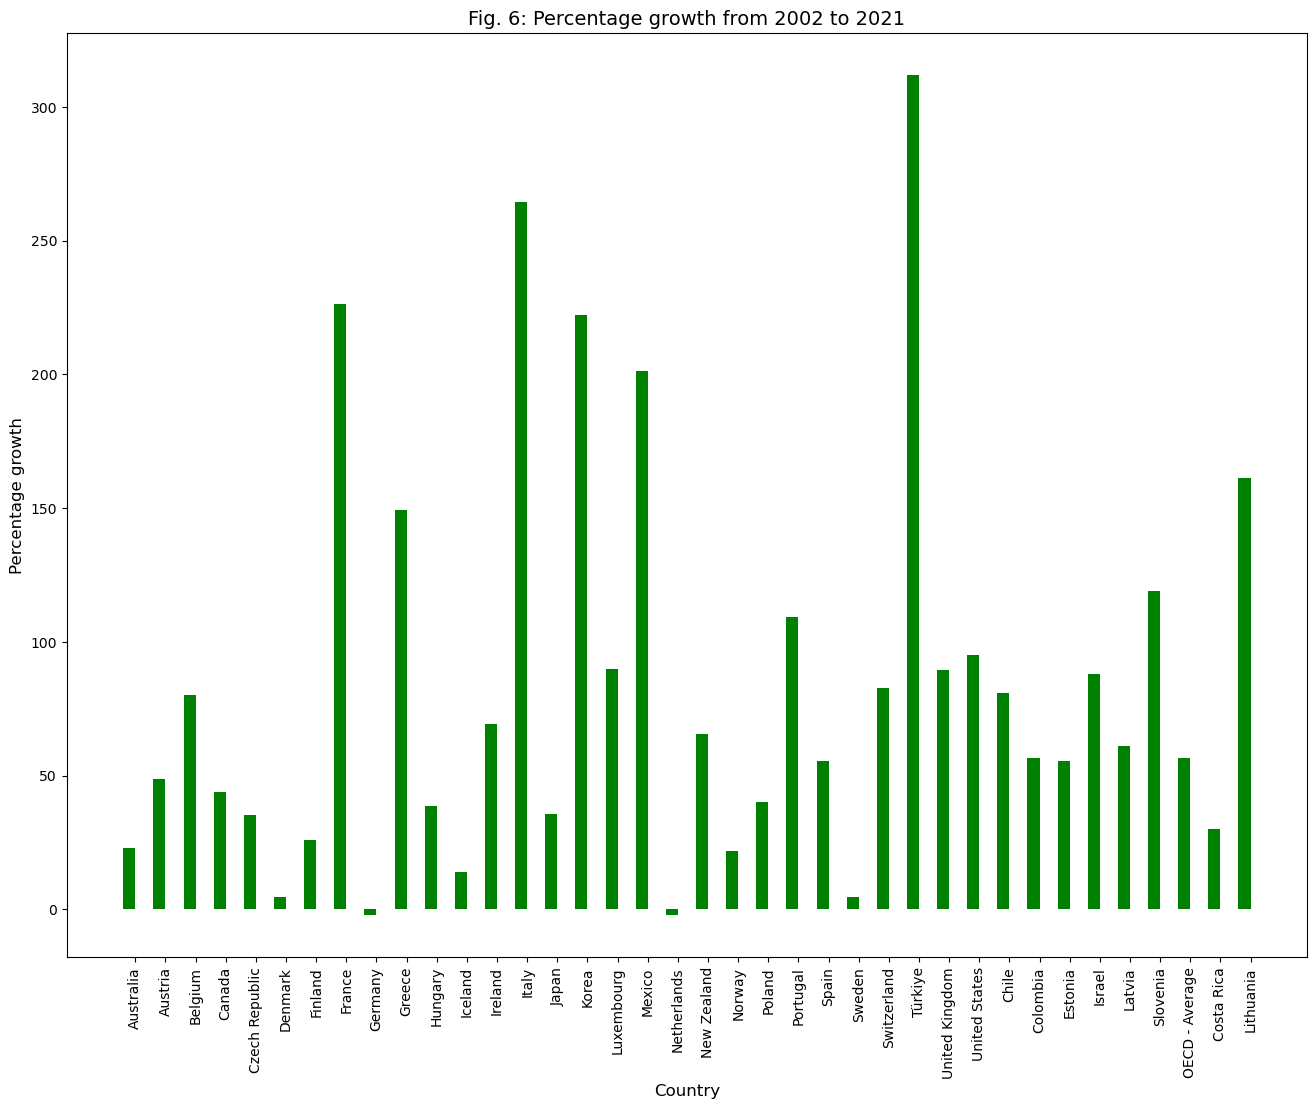

In [74]:
##Figure 6: which countries developed most in percentage?
#Using previously assigned variables and pct_change function to calculate percentual change in percentage
pct_change = pd.Series(val_2).div(val_1).sub(1).mul(100)

plt.figure(figsize=(16, 12))
plt.bar(x_pos, pct_change, width=0.4, color="green")

#Assigning names to the figure and axis
plt.title("Fig. 6: Percentage growth from 2002 to 2021", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage growth", fontsize=12)

plt.xticks([x + 0.2 for x in x_pos], countries)
plt.xticks(rotation=90)

##plt.savefig('fig_6.png', dpi = 300, bbox_inches='tight')
plt.show()

In [75]:
##Table 3: list over the countries with the highest and lowest growth
df_pct = pd.DataFrame({'percentage_change':pct_change, 'Country':countries})

#The 5 countries with the highest percentage growth
top_5_growth = df_pct.nlargest(5, 'percentage_change')

#The 5 countries with the lowest percentage growth
bottom_5_growth = df_pct.nsmallest(5, 'percentage_change')

#Printing results
print("The 5 countries with the highest percentage growth:")
print(top_5_growth)
print("\nThe 5 countries with the lowest percentage growth:")
print(bottom_5_growth)

The 5 countries with the highest percentage growth:
    percentage_change  Country
26         311.904762  Türkiye
13         264.285714    Italy
7          226.446281   France
15         222.033898    Korea
17         201.250000   Mexico

The 5 countries with the lowest percentage growth:
    percentage_change      Country
8           -2.173913      Germany
18          -2.058824  Netherlands
24           4.444444       Sweden
5            4.473684      Denmark
11          13.753582      Iceland


2.7

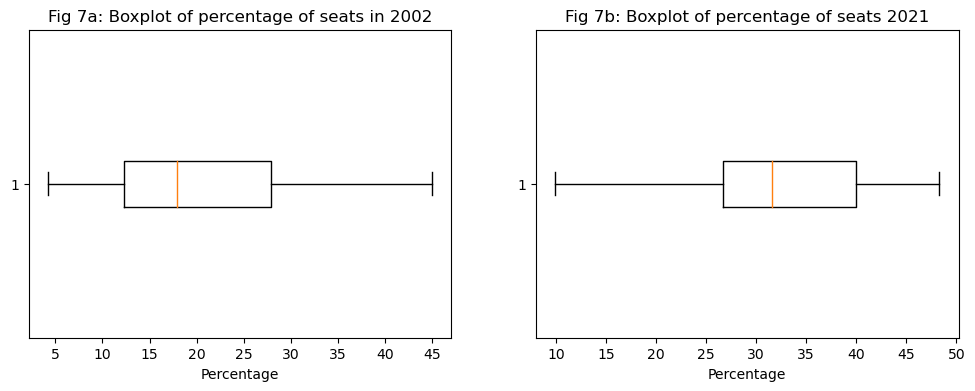

In [76]:
##Figure 7: two boxplots of the seats held by women in parliament in 2002 and 2021
#Creating the first figure using previously defined variables
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].boxplot(val_1, vert=False)
ax[0].set_title("Fig 7a: Boxplot of percentage of seats in 2002")
ax[0].set_xlabel("Percentage")

#Creating the second figure and boxplot of the values of year 2021
ax[1].boxplot(val_2, vert=False)
ax[1].set_title("Fig 7b: Boxplot of percentage of seats 2021")
ax[1].set_xlabel("Percentage")

##plt.savefig('fig_7.png', dpi=300)
plt.show()

End